# Dementia Prediction Project  
Sarah Spalding  
Goal: The goal of this project is to analyze an existing dataset comparing individuals with and without dementia and to predict the likelihood of dementia in other individuals based off of this dataset

In [2]:
# import libraries
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Exploratory Data Analysis with SQL
Goal: get a general feel for the data and trends

In [3]:
# connect to database and create a new dataframe to manipulate
conn = sqlite3.connect("Dementia.db")
query = 'SELECT * FROM Data_Wrangled'
data_explore = pd.read_sql(query, conn)

In [4]:
data_explore.head()

,level_0,index,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group_Converted,Group_Demented,Group_Nondemented
0,0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883,0,0,1
1,1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876,0,0,1
2,2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,1,75,12,2.0,23.0,0.5,1678,0.736,1.046,0,1,0
3,3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,1,76,12,2.0,28.0,0.5,1738,0.713,1.010,0,1,0
4,4,4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,1,80,12,2.0,22.0,0.5,1698,0.701,1.034,0,1,0


In [5]:
# display the average age of the patients
pd.read_sql('select avg("Age") as Average_Age from Data_Wrangled', conn)

,Average_Age
0,77.013405


In [6]:
# determine the number of patients with dementia, without dementia, and converted
pd.read_sql('select "Group", count(distinct("Subject ID")) as "Number_Patients" from Raw_Data group by "Group";', conn)

,Group,Number_Patients
0,Converted,14
1,Demented,64
2,Nondemented,72


In [7]:
# determine the number of patients in the study
pd.read_sql('select count(distinct("Subject ID")) as "Number_Patients" from Data_Wrangled;', conn)

,Number_Patients
0,150


In [8]:
# Determine the average, maximum, and minumum MMSE of the study
pd.read_sql('select avg(MMSE) as "Average_MMSE", max(MMSE) as "Max_MMSE", min(MMSE) as "Min_MMSE" from Data_Wrangled;', conn)

,Average_MMSE,Max_MMSE,Min_MMSE
0,27.340483,30.0,4.0


In [9]:
# Determine the average, maximum, and minumum CDR of the study
pd.read_sql('select avg(CDR) as "Average_CDR", max(CDR) as "Max_CDR", min(CDR) as "Min_CDR" from Data_Wrangled;', conn)

,Average_CDR,Max_CDR,Min_CDR
0,0.290885,2.0,0.0


In [10]:
# determine the number of male and female patients in the study
pd.read_sql('select "M/F", count(distinct("Subject ID")) as "Number_Patients" from Raw_Data group by "M/F";', conn)

,M/F,Number_Patients
0,F,88
1,M,62


In [11]:
# maximum number of patient visits
pd.read_sql('select max("Visit") as "Max_Visits" from Data_Wrangled;', conn)

,Max_Visits
0,5


In [12]:
# group data by visit number
pd.read_sql('select * from Data_Wrangled where "Visit" = 1;', conn)

,level_0,index,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group_Converted,Group_Demented,Group_Nondemented
0,0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883,0,0,1
1,2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,1,75,12,2.0,23.0,0.5,1678,0.736,1.046,0,1,0
2,5,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444,0,0,1
3,7,7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039,0,0,1
4,10,10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,1,71,16,2.0,28.0,0.5,1357,0.748,1.293,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,359,359,OAS2_0182,OAS2_0182_MR1,Demented,1,0,1,73,12,2.0,23.0,0.5,1661,0.698,1.056,0,1,0
146,361,361,OAS2_0183,OAS2_0183_MR1,Nondemented,1,0,0,66,13,2.0,30.0,0.0,1495,0.746,1.174,0,0,1
147,365,365,OAS2_0184,OAS2_0184_MR1,Demented,1,0,0,72,16,3.0,24.0,0.5,1354,0.733,1.296,0,1,0
148,367,367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,1,80,16,1.0,28.0,0.5,1704,0.711,1.030,0,1,0


In [13]:
# determine the number of male patients in the study with Dementia
male_data = pd.read_sql('select count(distinct("Subject ID")) as "Number_Patients_Male", "Group" from Raw_Data where "M/F" = "M" group by "Group";', conn)
male_data

,Number_Patients_Male,Group
0,4,Converted
1,36,Demented
2,22,Nondemented


In [14]:
# determine the number of Female patients in the study with Dementia
female_data = pd.read_sql('select count(distinct("Subject ID")) as "Number_Patients_Female", "Group" from Raw_Data where "M/F" = "F" group by "Group";', conn)

In [15]:
# function to get percentages
# Numbers is subest of one of the columns that you are interested in having a percent of
# Total is the total of that subset
def MakePercentages(Numbers,Total):
    percentages = [(elem/Total)*100 for elem in Numbers]
    return pd.DataFrame({'Percentages':percentages,'Group':['Converted','Demented','Nondemented']})

In [16]:
# calculate percentage of males with and without dementia and compare
number_males = pd.read_sql('select count(distinct("Subject ID")) as "Number_Patients" from Raw_Data where "M/F" = "M";', conn).at[0,'Number_Patients']
male_data_percentages_df = MakePercentages(male_data['Number_Patients_Male'],number_males)
male_data_percentages_df

,Percentages,Group
0,6.451613,Converted
1,58.064516,Demented
2,35.483871,Nondemented


In [17]:
# calculate the percentage of females with and without dementia
number_females = pd.read_sql('select count(distinct("Subject ID")) as "Number_Patients" from Raw_Data where "M/F" = "F";', conn).at[0,'Number_Patients']
female_data_percentages_df = MakePercentages(female_data['Number_Patients_Female'],number_females)
female_data_percentages_df

,Percentages,Group
0,11.363636,Converted
1,31.818182,Demented
2,56.818182,Nondemented


### Scatter Plots

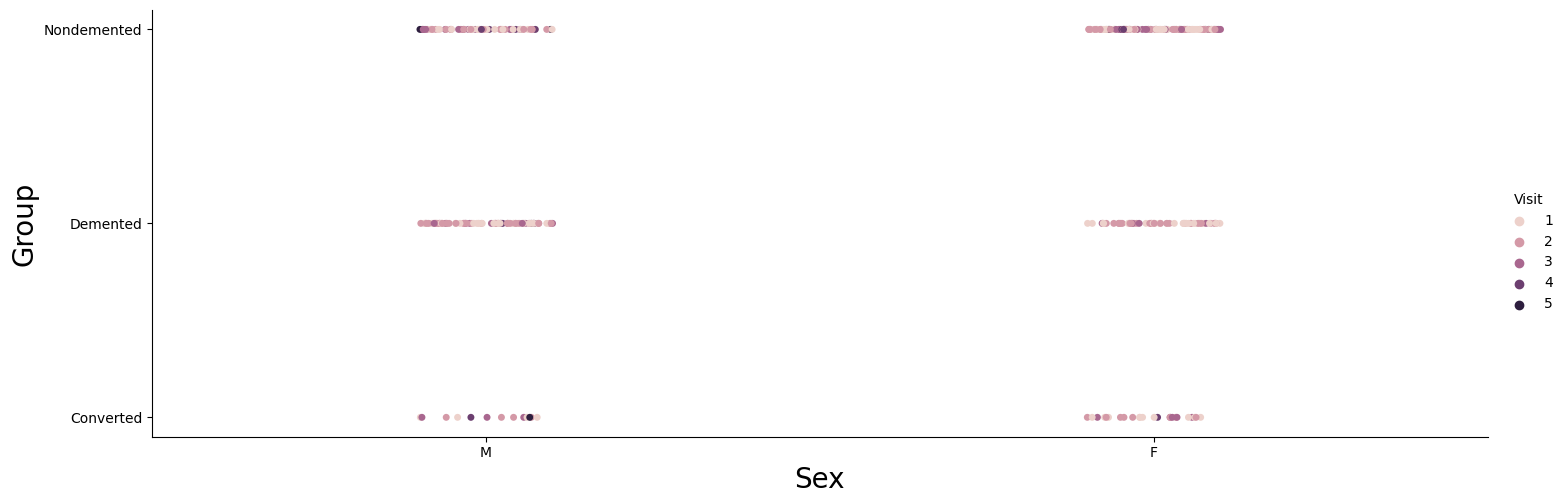

In [18]:
# Sex vs Group with the legend showing visit number
age_v_group = pd.read_sql('select "Group", "M/F", "Visit" from Raw_Data;', conn)
sns.catplot(y='Group', x='M/F', hue='Visit', data=age_v_group, aspect=3)
plt.xlabel('Sex', fontsize = 20)
plt.ylabel('Group', fontsize = 20)
plt.show()

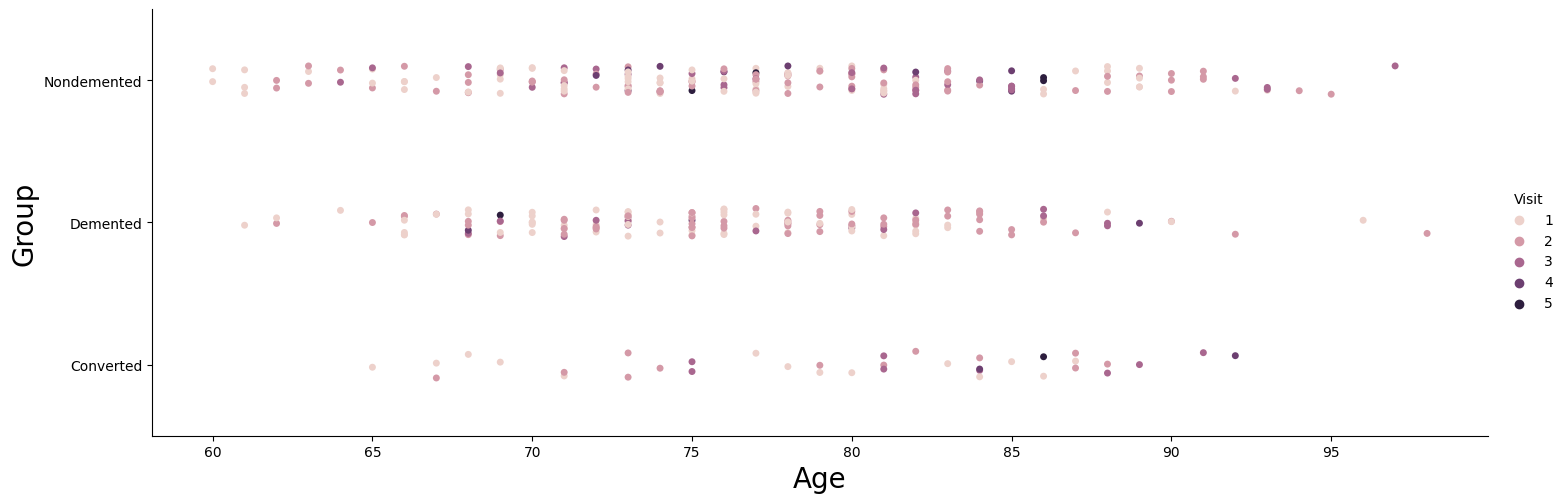

In [19]:
# Age vs Group with the legend showing visit number
age_v_group = pd.read_sql('select "Group", "Age", "Visit" from Data_Wrangled;', conn)
sns.catplot(y='Group', x='Age', hue='Visit', data=age_v_group, aspect=3)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Group', fontsize = 20)
plt.show()


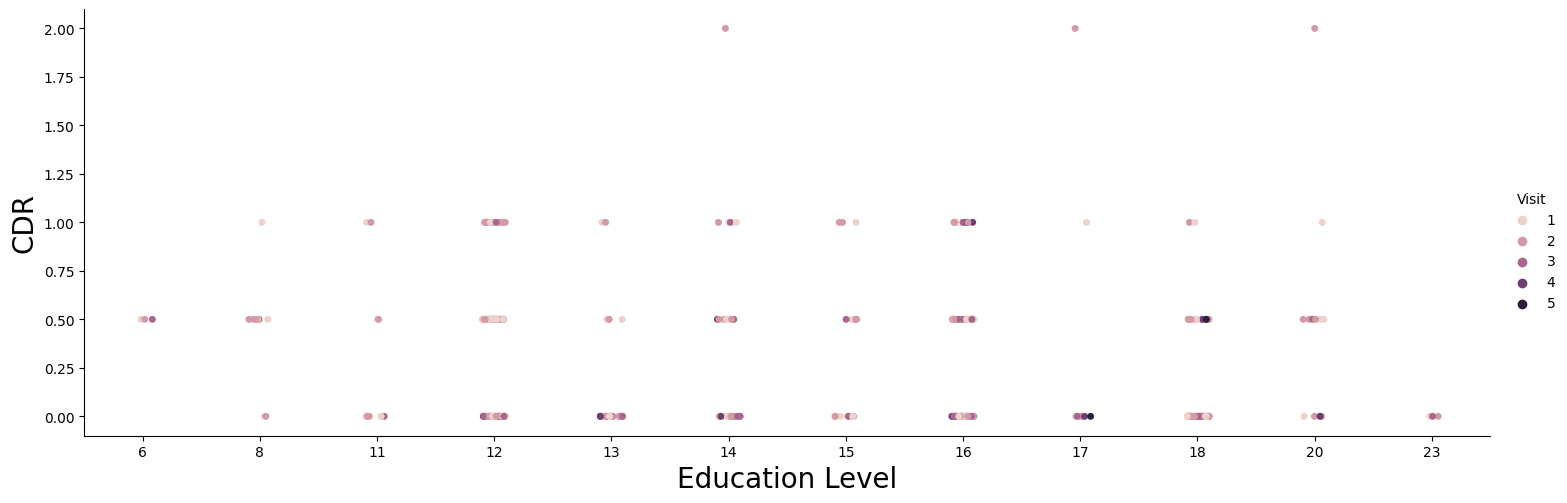

In [20]:
# Education vs Group with the legend showing visit number
educ_v_group = pd.read_sql('select "CDR", "EDUC", "Visit" from Data_Wrangled;', conn)
sns.catplot(y='CDR', x='EDUC', hue='Visit', data=educ_v_group, aspect=3)
plt.xlabel('Education Level', fontsize = 20)
plt.ylabel('CDR', fontsize = 20)
plt.show()


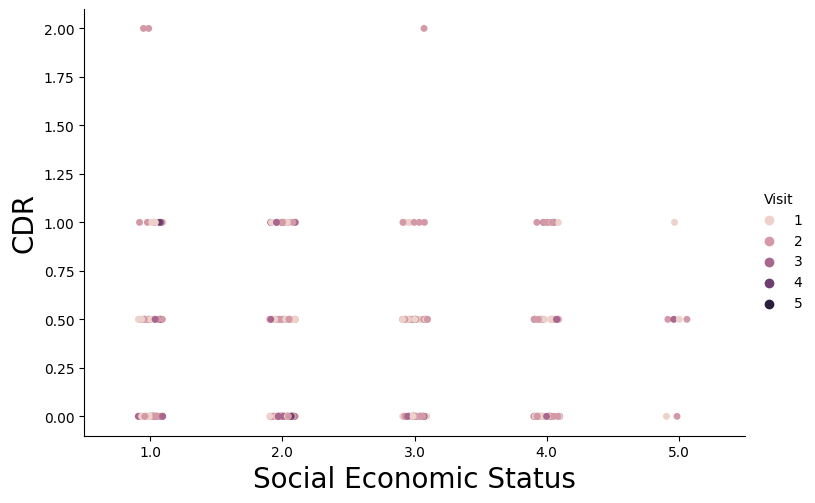

In [21]:
# SES vs Group with the legend showing visit number
ses_v_group = pd.read_sql('select "CDR", "SES", "Visit" from Data_Wrangled;', conn)
sns.catplot(y='CDR', x='SES', hue='Visit', data=ses_v_group, aspect=1.5)
plt.xlabel('Social Economic Status', fontsize = 20)
plt.ylabel('CDR', fontsize = 20)
plt.show()

### Correlation between Variables

In [22]:
# use correlation function to find correlation between variables (1 = stong positive, -1 = strong negative, 0 = none)
data_explore[['M/F','Age','EDUC','SES','MMSE','CDR','eTIV','nWBV','ASF','Group_Converted','Group_Demented','Group_Nondemented']].corr()

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group_Converted,Group_Demented,Group_Nondemented
M/F,1.000000,-0.037726,0.089279,-0.048504,-0.166084,0.202140,0.572549,-0.249618,-0.561647,-0.052032,0.259405,-0.222146
Age,-0.037726,1.000000,-0.027886,-0.045410,0.055672,-0.026257,0.042348,-0.518359,-0.035067,0.119302,-0.079153,0.005941
EDUC,0.089279,-0.027886,1.000000,-0.691222,0.194902,-0.153121,0.257015,-0.012200,-0.241752,0.099536,-0.258708,0.193060
SES,-0.048504,-0.045410,-0.691222,1.000000,-0.138862,0.052313,-0.249030,0.092361,0.240831,-0.211859,0.169569,-0.038870
MMSE,-0.166084,0.055672,0.194902,-0.138862,1.000000,-0.680769,-0.030866,0.341742,0.038359,0.120778,-0.610486,0.523802
CDR,0.202140,-0.026257,-0.153121,0.052313,-0.680769,1.000000,0.022819,-0.344819,-0.029340,-0.030277,0.815473,-0.778049
eTIV,0.572549,0.042348,0.257015,-0.249030,-0.030866,0.022819,1.000000,-0.210122,-0.988877,-0.054442,-0.010392,0.042700
nWBV,-0.249618,-0.518359,-0.012200,0.092361,0.341742,-0.344819,-0.210122,1.000000,0.213476,-0.052245,-0.286903,0.311346
ASF,-0.561647,-0.035067,-0.241752,0.240831,0.038359,-0.029340,-0.988877,0.213476,1.000000,0.040773,0.008312,-0.032495
Group_Converted,-0.052032,0.119302,0.099536,-0.211859,0.120778,-0.030277,-0.054442,-0.052245,0.040773,1.000000,-0.266131,-0.338129


MMSE and CDR are strongly negatively correlated, which is expected  
nWBV shows a correlation to MMSE and CDR  
M/F shows a correlation with Demented and Nondemented  

In [23]:
data_explore.describe()

,level_0,index,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group_Converted,Group_Demented,Group_Nondemented
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,186.000000,186.000000,1.882038,595.104558,0.428954,77.013405,14.597855,2.436997,27.340483,0.290885,1488.128686,0.729568,1.195461,0.099196,0.391421,0.509383
std,107.820066,107.820066,0.922843,635.485118,0.495592,7.640957,2.876339,1.109307,3.673415,0.374557,176.139286,0.037135,0.138092,0.299326,0.488724,0.500583
min,0.000000,0.000000,1.000000,0.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000,0.000000,0.000000,0.000000
25%,93.000000,93.000000,1.000000,0.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000,0.000000,0.000000,0.000000
50%,186.000000,186.000000,2.000000,552.000000,0.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000,0.000000,0.000000,1.000000
75%,279.000000,279.000000,2.000000,873.000000,1.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000,0.000000,1.000000,1.000000
max,372.000000,372.000000,5.000000,2639.000000,1.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000,1.000000,1.000000,1.000000


### Box Plots

<AxesSubplot:xlabel='Group', ylabel='CDR'>

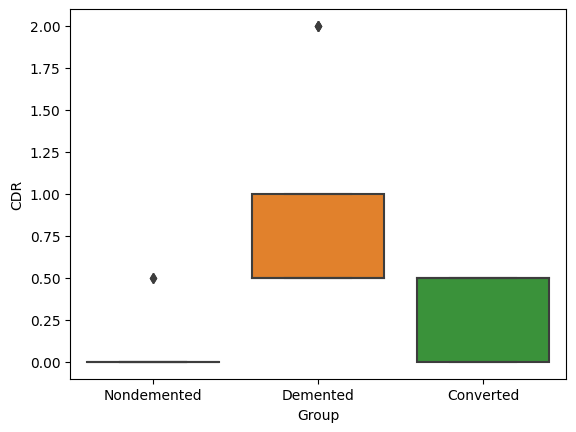

In [24]:
# box plot to visualize group and CDR
sns.boxplot(x = 'Group', y = 'CDR', data = data_explore)

<AxesSubplot:xlabel='Group', ylabel='MMSE'>

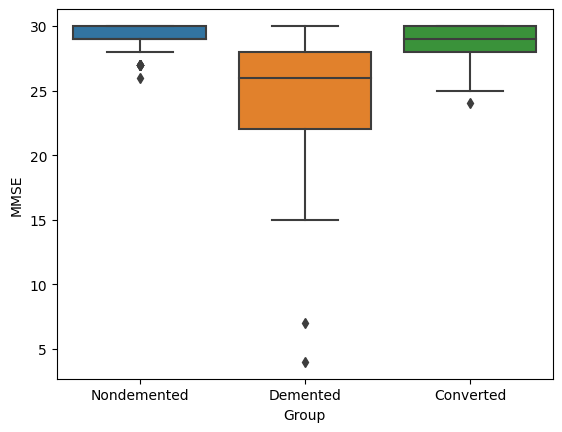

In [25]:
# box plot to visualize group and MMSE
sns.boxplot(x = 'Group', y = 'MMSE', data = data_explore)

<AxesSubplot:xlabel='Group', ylabel='Age'>

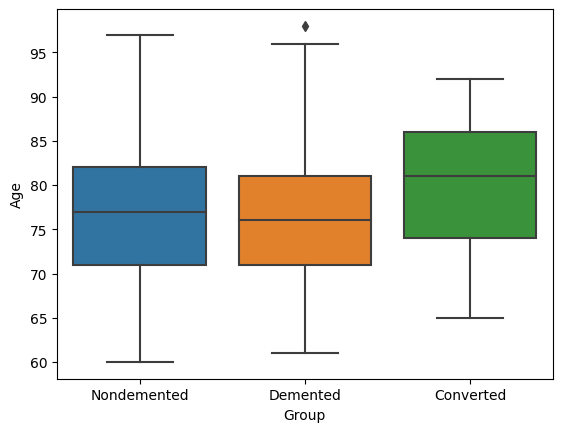

In [26]:
# box plot of group vs age
sns.boxplot(x = 'Group', y = 'Age', data = data_explore)

<AxesSubplot:xlabel='Group', ylabel='nWBV'>

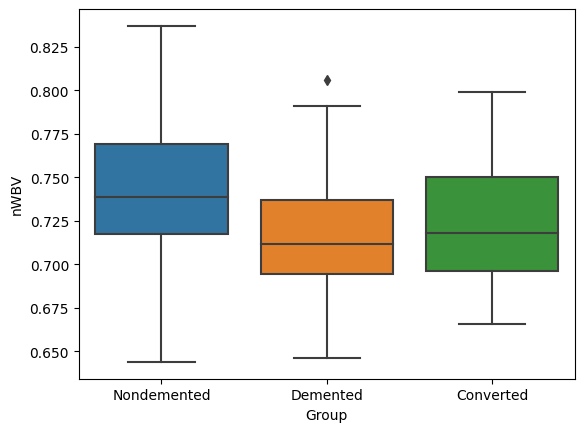

In [27]:
# box plot of group vs age
sns.boxplot(x = 'Group', y = 'nWBV', data = data_explore)

### Histograms

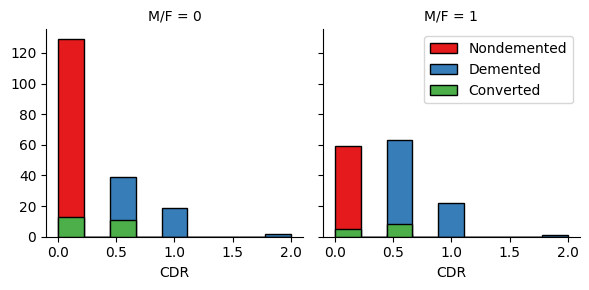

In [28]:
# Histogram showing the frequency of CDR with each group for the two sexs
bins = np.linspace(data_explore.CDR.min(), data_explore.CDR.max(), 10)
g = sns.FacetGrid(data_explore, col="M/F", hue="Group", palette="Set1", col_wrap=2)
g.map(plt.hist, 'CDR', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

<AxesSubplot:xlabel='EDUC', ylabel='Count'>

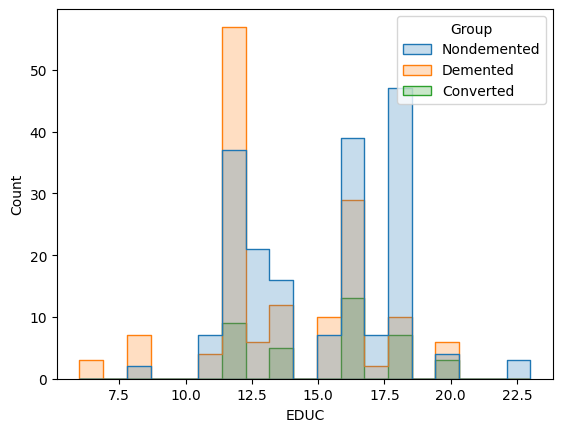

In [29]:
# histogram for frquency of education for the 3 group
bins = np.linspace(data_explore.EDUC.min(), data_explore.EDUC.max(), 20)
sns.histplot(data_explore, x='EDUC',hue = 'Group', bins = bins, element = 'step',legend=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

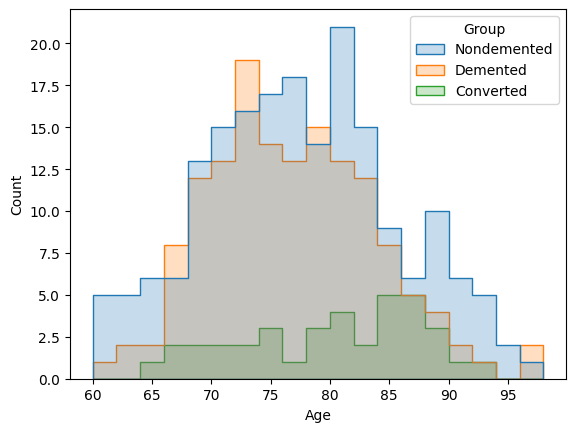

In [30]:
# histogram for frquency of ages for the 3 group
bins = np.linspace(data_explore.Age.min(), data_explore.Age.max(), 20)
sns.histplot(data_explore, x='Age',hue = 'Group', bins = bins, element = 'step',legend=True)

<AxesSubplot:xlabel='SES', ylabel='Count'>

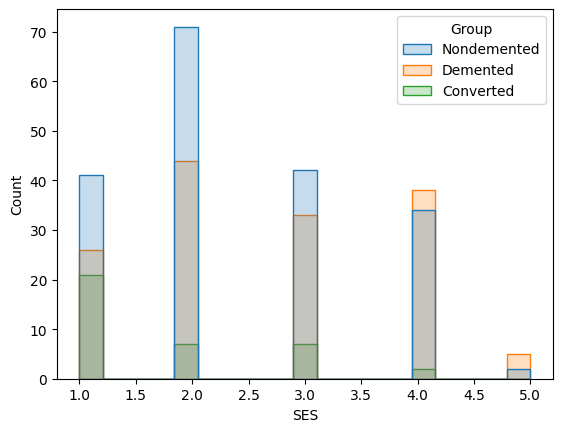

In [31]:
# histogram for frquency of SES for the 3 group
bins = np.linspace(data_explore.SES.min(), data_explore.SES.max(), 20)
sns.histplot(data_explore, x='SES',hue = 'Group', bins = bins, element = 'step',legend=True)

<AxesSubplot:xlabel='eTIV', ylabel='Count'>

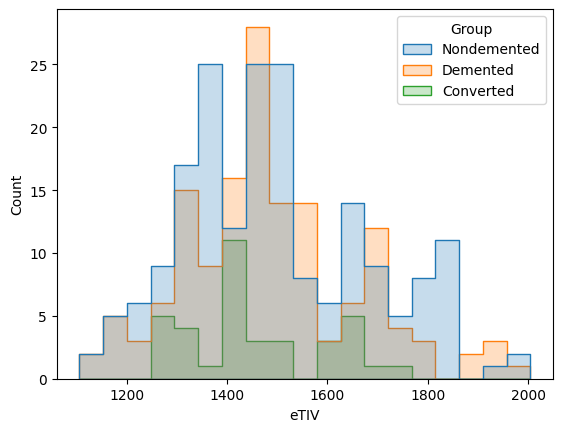

In [32]:
# histogram for frquency of eTIV for the 3 group
bins = np.linspace(data_explore.eTIV.min(), data_explore.eTIV.max(), 20)
sns.histplot(data_explore, x='eTIV',hue = 'Group', bins = bins, element = 'step',legend=True)

<AxesSubplot:xlabel='nWBV', ylabel='Count'>

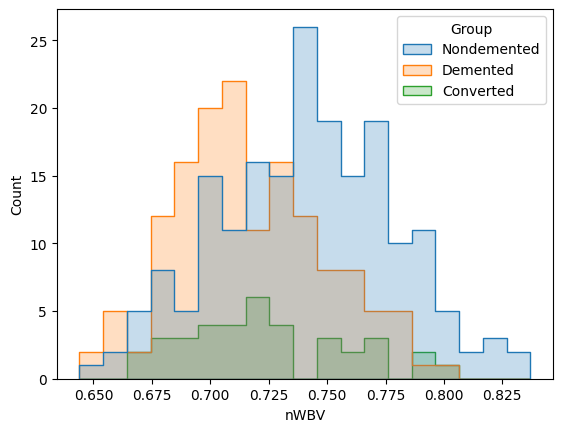

In [33]:
# histogram for frquency of nWBV for the 3 group
bins = np.linspace(data_explore.nWBV.min(), data_explore.nWBV.max(), 20)
sns.histplot(data_explore, x='nWBV',hue = 'Group', bins = bins, element = 'step',legend=True)

<AxesSubplot:xlabel='ASF', ylabel='Count'>

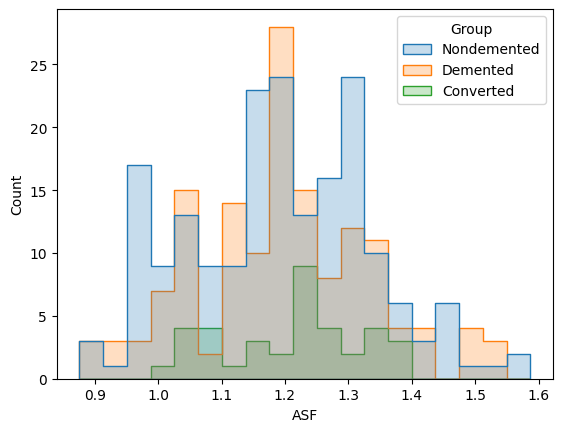

In [34]:
# histogram for frquency of ASF for the 3 group
bins = np.linspace(data_explore.ASF.min(), data_explore.ASF.max(), 20)
sns.histplot(data_explore, x='ASF',hue = 'Group', bins = bins, element = 'step',legend=True)

<AxesSubplot:xlabel='Visit', ylabel='Count'>

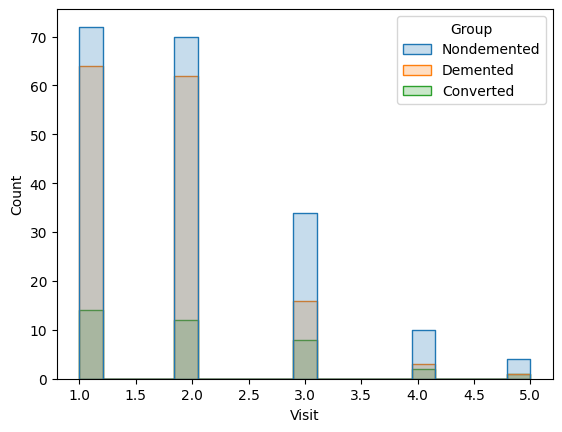

In [35]:
# Did dementia worsen over the visits?
bins = np.linspace(data_explore.Visit.min(), data_explore.Visit.max(), 20)
sns.histplot(data_explore, x='Visit',hue = 'Group', bins = bins, element = 'step',legend=True)
# this is not the most accurate representation, would need to divide by the total number of patients at each visit

### Statistical Analysis

In [36]:
# table of p values
df_pvalues = pd.DataFrame({'Comparison':['Demented v NonDemented','Nondemented v Converted','Demented v Converted','Total Comparison']})

# table of f values
df_fvalues = pd.DataFrame({'Comparison':['Demented v NonDemented','Nondemented v Converted','Demented v Converted','Total Comparison']})

In [37]:
# Anova test function - compare all groups
def TotalAnova (Group1,Group2,Group3,ColumnName):
    f_val, p_val = stats.f_oneway(Group1,Group2,Group3)
    f_val1, p_val1 = stats.f_oneway(Group1, Group2)  
    f_val2, p_val2 = stats.f_oneway(Group3,Group2)  
    f_val3, p_val3 = stats.f_oneway(Group3, Group1)  
    if p_val < 0.05:
        print("TOTAL: The P Value is less than alpha, therefore the null hypothesis is rejected and the groups are significantly different")
        print( "ANOVA results: F=", f_val, ", P =", p_val)
    else:
        print("TOTAL: The P Value is greater than alpha, therefore the null hypothesis is not rejected and the groups are not significantly different")
        print( "ANOVA results: F=", f_val, ", P =", p_val)
    if p_val1 <0.05:
        print("Group1 and Group2 are significantly different")
        print( "ANOVA results: F=", f_val1, ", P =", p_val1)
    else:
        print("Group1 and Group2 are not significantly different")
        print( "ANOVA results: F=", f_val1, ", P =", p_val1)
    if p_val2 <0.05:
        print("Group2 and Group3 are significantly different")
        print( "ANOVA results: F=", f_val2, ", P =", p_val2)
    else:
        print("Group2 and Group3 are not significantly different")
        print( "ANOVA results: F=", f_val2, ", P =", p_val2)
    if p_val3 <0.05:
        print("Group1 and Group3 are significantly different")
        print( "ANOVA results: F=", f_val3, ", P =", p_val3)
    else:
        print("Group1 and Group3 are not significantly different")
        print( "ANOVA results: F=", f_val3, ", P =", p_val3)
    pvalues = [p_val,p_val1,p_val2,p_val3]
    df_pvalues[ColumnName]=pvalues
    fvalues = [f_val,f_val1,f_val2,f_val3]
    df_fvalues[ColumnName] = fvalues
    return df_fvalues, df_pvalues

In [38]:
# Anova test on nWBV
grouped_test=data_explore[['Group', 'nWBV']].groupby(['Group'])
TotalAnova(grouped_test.get_group('Demented')['nWBV'], grouped_test.get_group('Nondemented')['nWBV'], grouped_test.get_group('Converted')['nWBV'],'nWBV')

TOTAL: The P Value is less than alpha, therefore the null hypothesis is rejected and the groups are significantly different
ANOVA results: F= 20.58103386993973 , P = 3.3489316291000117e-09
Group1 and Group2 are significantly different
ANOVA results: F= 40.06628252307995 , P = 7.904899553448725e-10
Group2 and Group3 are significantly different
ANOVA results: F= 6.544760418385766 , P = 0.011176131047061335
Group1 and Group3 are not significantly different
ANOVA results: F= 1.5280781908267944 , P = 0.2180028804501464


(                Comparison       nWBV
 0   Demented v NonDemented  20.581034
 1  Nondemented v Converted  40.066283
 2     Demented v Converted   6.544760
 3         Total Comparison   1.528078,
                 Comparison          nWBV
 0   Demented v NonDemented  3.348932e-09
 1  Nondemented v Converted  7.904900e-10
 2     Demented v Converted  1.117613e-02
 3         Total Comparison  2.180029e-01)

In [39]:
# Anova test on eTIV
grouped_test=data_explore[['Group', 'eTIV']].groupby(['Group'])
TotalAnova(grouped_test.get_group('Demented')['eTIV'], grouped_test.get_group('Nondemented')['eTIV'], grouped_test.get_group('Converted')['eTIV'],'eTIV')

TOTAL: The P Value is greater than alpha, therefore the null hypothesis is not rejected and the groups are not significantly different
ANOVA results: F= 0.6740185204155615 , P = 0.5102810359581578
Group1 and Group2 are not significantly different
ANOVA results: F= 0.23693890104875495 , P = 0.6267450606240466
Group2 and Group3 are not significantly different
ANOVA results: F= 1.2843978040170665 , P = 0.2582890846795186
Group1 and Group3 are not significantly different
ANOVA results: F= 0.7491031334243587 , P = 0.387906064072459


(                Comparison       nWBV      eTIV
 0   Demented v NonDemented  20.581034  0.674019
 1  Nondemented v Converted  40.066283  0.236939
 2     Demented v Converted   6.544760  1.284398
 3         Total Comparison   1.528078  0.749103,
                 Comparison          nWBV      eTIV
 0   Demented v NonDemented  3.348932e-09  0.510281
 1  Nondemented v Converted  7.904900e-10  0.626745
 2     Demented v Converted  1.117613e-02  0.258289
 3         Total Comparison  2.180029e-01  0.387906)

In [40]:
# Anova test on ASF
grouped_test=data_explore[['Group', 'ASF']].groupby(['Group'])
TotalAnova(grouped_test.get_group('Demented')['ASF'], grouped_test.get_group('Nondemented')['ASF'], grouped_test.get_group('Converted')['ASF'],'ASF')

TOTAL: The P Value is greater than alpha, therefore the null hypothesis is not rejected and the groups are not significantly different
ANOVA results: F= 0.3814421553349557 , P = 0.6831441026111751
Group1 and Group2 are not significantly different
ANOVA results: F= 0.1408227936353781 , P = 0.7077026019359458
Group2 and Group3 are not significantly different
ANOVA results: F= 0.729514175725481 , P = 0.39394915111556694
Group1 and Group3 are not significantly different
ANOVA results: F= 0.4071900175096386 , P = 0.5242056995296573


(                Comparison       nWBV      eTIV       ASF
 0   Demented v NonDemented  20.581034  0.674019  0.381442
 1  Nondemented v Converted  40.066283  0.236939  0.140823
 2     Demented v Converted   6.544760  1.284398  0.729514
 3         Total Comparison   1.528078  0.749103  0.407190,
                 Comparison          nWBV      eTIV       ASF
 0   Demented v NonDemented  3.348932e-09  0.510281  0.683144
 1  Nondemented v Converted  7.904900e-10  0.626745  0.707703
 2     Demented v Converted  1.117613e-02  0.258289  0.393949
 3         Total Comparison  2.180029e-01  0.387906  0.524206)

In [41]:
# Anova test on EDUC
grouped_test=data_explore[['Group', 'EDUC']].groupby(['Group'])
TotalAnova(grouped_test.get_group('Demented')['EDUC'], grouped_test.get_group('Nondemented')['EDUC'], grouped_test.get_group('Converted')['EDUC'],'EDUC')

TOTAL: The P Value is less than alpha, therefore the null hypothesis is rejected and the groups are significantly different
ANOVA results: F= 13.48571931311858 , P = 2.2225709446210596e-06
Group1 and Group2 are significantly different
ANOVA results: F= 22.602752516340356 , P = 2.9662585795750533e-06
Group2 and Group3 are not significantly different
ANOVA results: F= 0.42522990686147216 , P = 0.5150044834547056
Group1 and Group3 are significantly different
ANOVA results: F= 11.80418695430933 , P = 0.00073292009499497


(                Comparison       nWBV      eTIV       ASF       EDUC
 0   Demented v NonDemented  20.581034  0.674019  0.381442  13.485719
 1  Nondemented v Converted  40.066283  0.236939  0.140823  22.602753
 2     Demented v Converted   6.544760  1.284398  0.729514   0.425230
 3         Total Comparison   1.528078  0.749103  0.407190  11.804187,
                 Comparison          nWBV      eTIV       ASF      EDUC
 0   Demented v NonDemented  3.348932e-09  0.510281  0.683144  0.000002
 1  Nondemented v Converted  7.904900e-10  0.626745  0.707703  0.000003
 2     Demented v Converted  1.117613e-02  0.258289  0.393949  0.515004
 3         Total Comparison  2.180029e-01  0.387906  0.524206  0.000733)

In [42]:
# Anova test on SES
grouped_test=data_explore[['Group', 'SES']].groupby(['Group'])
TotalAnova(grouped_test.get_group('Demented')['SES'], grouped_test.get_group('Nondemented')['SES'], grouped_test.get_group('Converted')['SES'],'SES')

TOTAL: The P Value is less than alpha, therefore the null hypothesis is rejected and the groups are significantly different
ANOVA results: F= 11.530847753745375 , P = 1.3870277899673076e-05
Group1 and Group2 are significantly different
ANOVA results: F= 5.30187990329756 , P = 0.02191676292704129
Group2 and Group3 are significantly different
ANOVA results: F= 12.80273773602832 , P = 0.0004237982861456631
Group1 and Group3 are significantly different
ANOVA results: F= 21.189273981046796 , P = 7.812385870291958e-06


(                Comparison       nWBV      eTIV       ASF       EDUC  \
 0   Demented v NonDemented  20.581034  0.674019  0.381442  13.485719   
 1  Nondemented v Converted  40.066283  0.236939  0.140823  22.602753   
 2     Demented v Converted   6.544760  1.284398  0.729514   0.425230   
 3         Total Comparison   1.528078  0.749103  0.407190  11.804187   
 
          SES  
 0  11.530848  
 1   5.301880  
 2  12.802738  
 3  21.189274  ,
                 Comparison          nWBV      eTIV       ASF      EDUC  \
 0   Demented v NonDemented  3.348932e-09  0.510281  0.683144  0.000002   
 1  Nondemented v Converted  7.904900e-10  0.626745  0.707703  0.000003   
 2     Demented v Converted  1.117613e-02  0.258289  0.393949  0.515004   
 3         Total Comparison  2.180029e-01  0.387906  0.524206  0.000733   
 
         SES  
 0  0.000014  
 1  0.021917  
 2  0.000424  
 3  0.000008  )

In [43]:
# Anova test on M/F
grouped_test=data_explore[['Group', 'M/F']].groupby(['Group'])
TotalAnova(grouped_test.get_group('Demented')['M/F'], grouped_test.get_group('Nondemented')['M/F'], grouped_test.get_group('Converted')['M/F'],'M/F')

TOTAL: The P Value is less than alpha, therefore the null hypothesis is rejected and the groups are significantly different
ANOVA results: F= 13.413107418661376 , P = 2.378227386028066e-06
Group1 and Group2 are significantly different
ANOVA results: F= 25.800062133854073 , P = 6.309924275544983e-07
Group2 and Group3 are not significantly different
ANOVA results: F= 0.12832488129757547 , P = 0.720511077023982
Group1 and Group3 are significantly different
ANOVA results: F= 6.895691251561899 , P = 0.009380187237640896


(                Comparison       nWBV      eTIV       ASF       EDUC  \
 0   Demented v NonDemented  20.581034  0.674019  0.381442  13.485719   
 1  Nondemented v Converted  40.066283  0.236939  0.140823  22.602753   
 2     Demented v Converted   6.544760  1.284398  0.729514   0.425230   
 3         Total Comparison   1.528078  0.749103  0.407190  11.804187   
 
          SES        M/F  
 0  11.530848  13.413107  
 1   5.301880  25.800062  
 2  12.802738   0.128325  
 3  21.189274   6.895691  ,
                 Comparison          nWBV      eTIV       ASF      EDUC  \
 0   Demented v NonDemented  3.348932e-09  0.510281  0.683144  0.000002   
 1  Nondemented v Converted  7.904900e-10  0.626745  0.707703  0.000003   
 2     Demented v Converted  1.117613e-02  0.258289  0.393949  0.515004   
 3         Total Comparison  2.180029e-01  0.387906  0.524206  0.000733   
 
         SES           M/F  
 0  0.000014  2.378227e-06  
 1  0.021917  6.309924e-07  
 2  0.000424  7.205111e-01  
 3  

In [44]:
# Anova test on Visit
grouped_test=data_explore[['Group', 'Visit']].groupby(['Group'])
TotalAnova(grouped_test.get_group('Demented')['Visit'], grouped_test.get_group('Nondemented')['Visit'], grouped_test.get_group('Converted')['Visit'],'Visit')

TOTAL: The P Value is less than alpha, therefore the null hypothesis is rejected and the groups are significantly different
ANOVA results: F= 3.2345653480814023 , P = 0.04049349679884828
Group1 and Group2 are significantly different
ANOVA results: F= 5.616470725982299 , P = 0.018360193702926086
Group2 and Group3 are not significantly different
ANOVA results: F= 0.10839996839767585 , P = 0.7422794248941007
Group1 and Group3 are not significantly different
ANOVA results: F= 3.5683378675539124 , P = 0.060490414430433036


(                Comparison       nWBV      eTIV       ASF       EDUC  \
 0   Demented v NonDemented  20.581034  0.674019  0.381442  13.485719   
 1  Nondemented v Converted  40.066283  0.236939  0.140823  22.602753   
 2     Demented v Converted   6.544760  1.284398  0.729514   0.425230   
 3         Total Comparison   1.528078  0.749103  0.407190  11.804187   
 
          SES        M/F     Visit  
 0  11.530848  13.413107  3.234565  
 1   5.301880  25.800062  5.616471  
 2  12.802738   0.128325  0.108400  
 3  21.189274   6.895691  3.568338  ,
                 Comparison          nWBV      eTIV       ASF      EDUC  \
 0   Demented v NonDemented  3.348932e-09  0.510281  0.683144  0.000002   
 1  Nondemented v Converted  7.904900e-10  0.626745  0.707703  0.000003   
 2     Demented v Converted  1.117613e-02  0.258289  0.393949  0.515004   
 3         Total Comparison  2.180029e-01  0.387906  0.524206  0.000733   
 
         SES           M/F     Visit  
 0  0.000014  2.378227e-06  0.0

In [45]:
# Anova test on Age
grouped_test=data_explore[['Group', 'Age']].groupby(['Group'])
TotalAnova(grouped_test.get_group('Demented')['Age'], grouped_test.get_group('Nondemented')['Age'], grouped_test.get_group('Converted')['Age'],'Age')

TOTAL: The P Value is less than alpha, therefore the null hypothesis is rejected and the groups are significantly different
ANOVA results: F= 3.1326616127075932 , P = 0.04476028095817546
Group1 and Group2 are not significantly different
ANOVA results: F= 0.9055688814215849 , P = 0.3419809831503381
Group2 and Group3 are not significantly different
ANOVA results: F= 3.5311865948607797 , P = 0.06151738330051571
Group1 and Group3 are significantly different
ANOVA results: F= 7.282905651666435 , P = 0.007620457386757697


(                Comparison       nWBV      eTIV       ASF       EDUC  \
 0   Demented v NonDemented  20.581034  0.674019  0.381442  13.485719   
 1  Nondemented v Converted  40.066283  0.236939  0.140823  22.602753   
 2     Demented v Converted   6.544760  1.284398  0.729514   0.425230   
 3         Total Comparison   1.528078  0.749103  0.407190  11.804187   
 
          SES        M/F     Visit       Age  
 0  11.530848  13.413107  3.234565  3.132662  
 1   5.301880  25.800062  5.616471  0.905569  
 2  12.802738   0.128325  0.108400  3.531187  
 3  21.189274   6.895691  3.568338  7.282906  ,
                 Comparison          nWBV      eTIV       ASF      EDUC  \
 0   Demented v NonDemented  3.348932e-09  0.510281  0.683144  0.000002   
 1  Nondemented v Converted  7.904900e-10  0.626745  0.707703  0.000003   
 2     Demented v Converted  1.117613e-02  0.258289  0.393949  0.515004   
 3         Total Comparison  2.180029e-01  0.387906  0.524206  0.000733   
 
         SES        

In [46]:
# make a new table in database for pvalues
df_pvalues.to_sql('P_Values',conn, if_exists='replace')
# make a new table in database for fvalues
df_fvalues.to_sql('F_Values',conn, if_exists='replace')